In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-white')

In [2]:
import pydot
from IPython.display import Image

In [67]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.externals.six import StringIO
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report, roc_auc_score
from scikitplot.metrics import plot_confusion_matrix

In [4]:
def print_tree(estimator, features, class_names=None, filled=True):
    tree=estimator
    names=features
    color=filled
    classn=class_names
    
    dot_data=StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph=pydot.graph_from_dot_data(dot_data.getvalue())
    return(graph)

#### Load the data set `Heart`

In [10]:
df=pd.read_csv('./Heart.csv').drop('Unnamed: 0', axis=1).dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
Age          297 non-null int64
Sex          297 non-null int64
ChestPain    297 non-null object
RestBP       297 non-null int64
Chol         297 non-null int64
Fbs          297 non-null int64
RestECG      297 non-null int64
MaxHR        297 non-null int64
ExAng        297 non-null int64
Oldpeak      297 non-null float64
Slope        297 non-null int64
Ca           297 non-null float64
Thal         297 non-null object
AHD          297 non-null object
dtypes: float64(2), int64(9), object(3)
memory usage: 34.8+ KB


In the Heart data, some of the predictors are qualitative. 

In [14]:
df.ChestPain=pd.factorize(df.ChestPain)[0]
df.Thal=pd.factorize(df.Thal)[0]

In [15]:
#Generate predictor and response variable
X=df.drop('AHD', axis=1)
y=pd.factorize(df.AHD)[0]

### Using Classification Tree Method and Figure 8.6 Bottom Right

In [17]:
clf=DecisionTreeClassifier(max_depth=None, max_leaf_nodes=6, max_features=3)
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=3, max_leaf_nodes=6, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

Mean accuracy on the given test data and labels.

In [18]:
clf.score(X,y)

0.8114478114478114

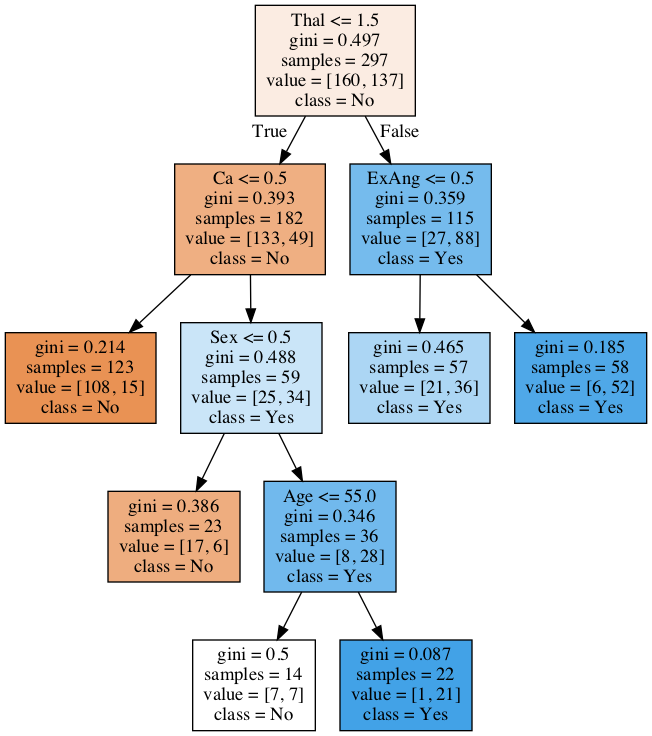

In [19]:
graph,=print_tree(clf, features=X.columns, class_names=['No','Yes'])
Image(graph.create_png())

## Estimating the best terminal nodes regression tree using Cross-Validation

In [23]:
tree_size=np.arange(2,31)
CVS=[]

for size in tree_size:
    clf_tr=DecisionTreeClassifier(max_leaf_nodes=size, random_state=123)
    cvs=cross_val_score(estimator=clf, X=X, y=y, cv=7, scoring='accuracy')
    CVS.append(np.mean(cvs))

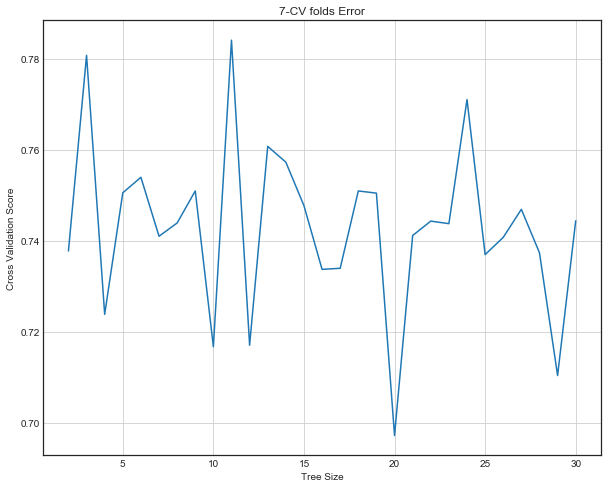

In [26]:
plt.figure(figsize=(10,8))
plt.plot(tree_size, CVS)
plt.title('7-CV folds Error')
plt.xlabel('Tree Size')
plt.ylabel('Cross Validation Score')
plt.grid(True)

# Lab 8.3.1 Fitting Classification Trees
 Use classification trees to analyze the `Carseats.csv` dataset.
 
#### Load the data Set 

In [37]:
Carseats=pd.read_csv('./Carseats.csv').drop('Unnamed: 0', axis=1)
Carseats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
Sales          400 non-null float64
CompPrice      400 non-null int64
Income         400 non-null int64
Advertising    400 non-null int64
Population     400 non-null int64
Price          400 non-null int64
ShelveLoc      400 non-null object
Age            400 non-null int64
Education      400 non-null int64
Urban          400 non-null object
US             400 non-null object
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In the dataset, Sales is a continuous variable, and so we begin by recording it as a binary variable.

In [38]:
Carseats['High']=Carseats.Sales.map(lambda x: 1 if x>8 else 0)

Now, we have to deal with the object type data

In [40]:
Carseats.ShelveLoc=pd.factorize(Carseats.ShelveLoc)[0]
Carseats.Urban=Carseats.Urban.map({'No':0, 'Yes':1})
Carseats.US=Carseats.US.map({'No':0, 'Yes':1})

In [41]:
Carseats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
Sales          400 non-null float64
CompPrice      400 non-null int64
Income         400 non-null int64
Advertising    400 non-null int64
Population     400 non-null int64
Price          400 non-null int64
ShelveLoc      400 non-null int64
Age            400 non-null int64
Education      400 non-null int64
Urban          400 non-null int64
US             400 non-null int64
High           400 non-null int64
dtypes: float64(1), int64(11)
memory usage: 37.6 KB


In [42]:
Carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0


In [44]:
X=Carseats.drop(['Sales','High'], axis=1)
y=Carseats.High

In [45]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.5, random_state=0)

In [46]:
Clf=DecisionTreeClassifier(max_depth=6)
Clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

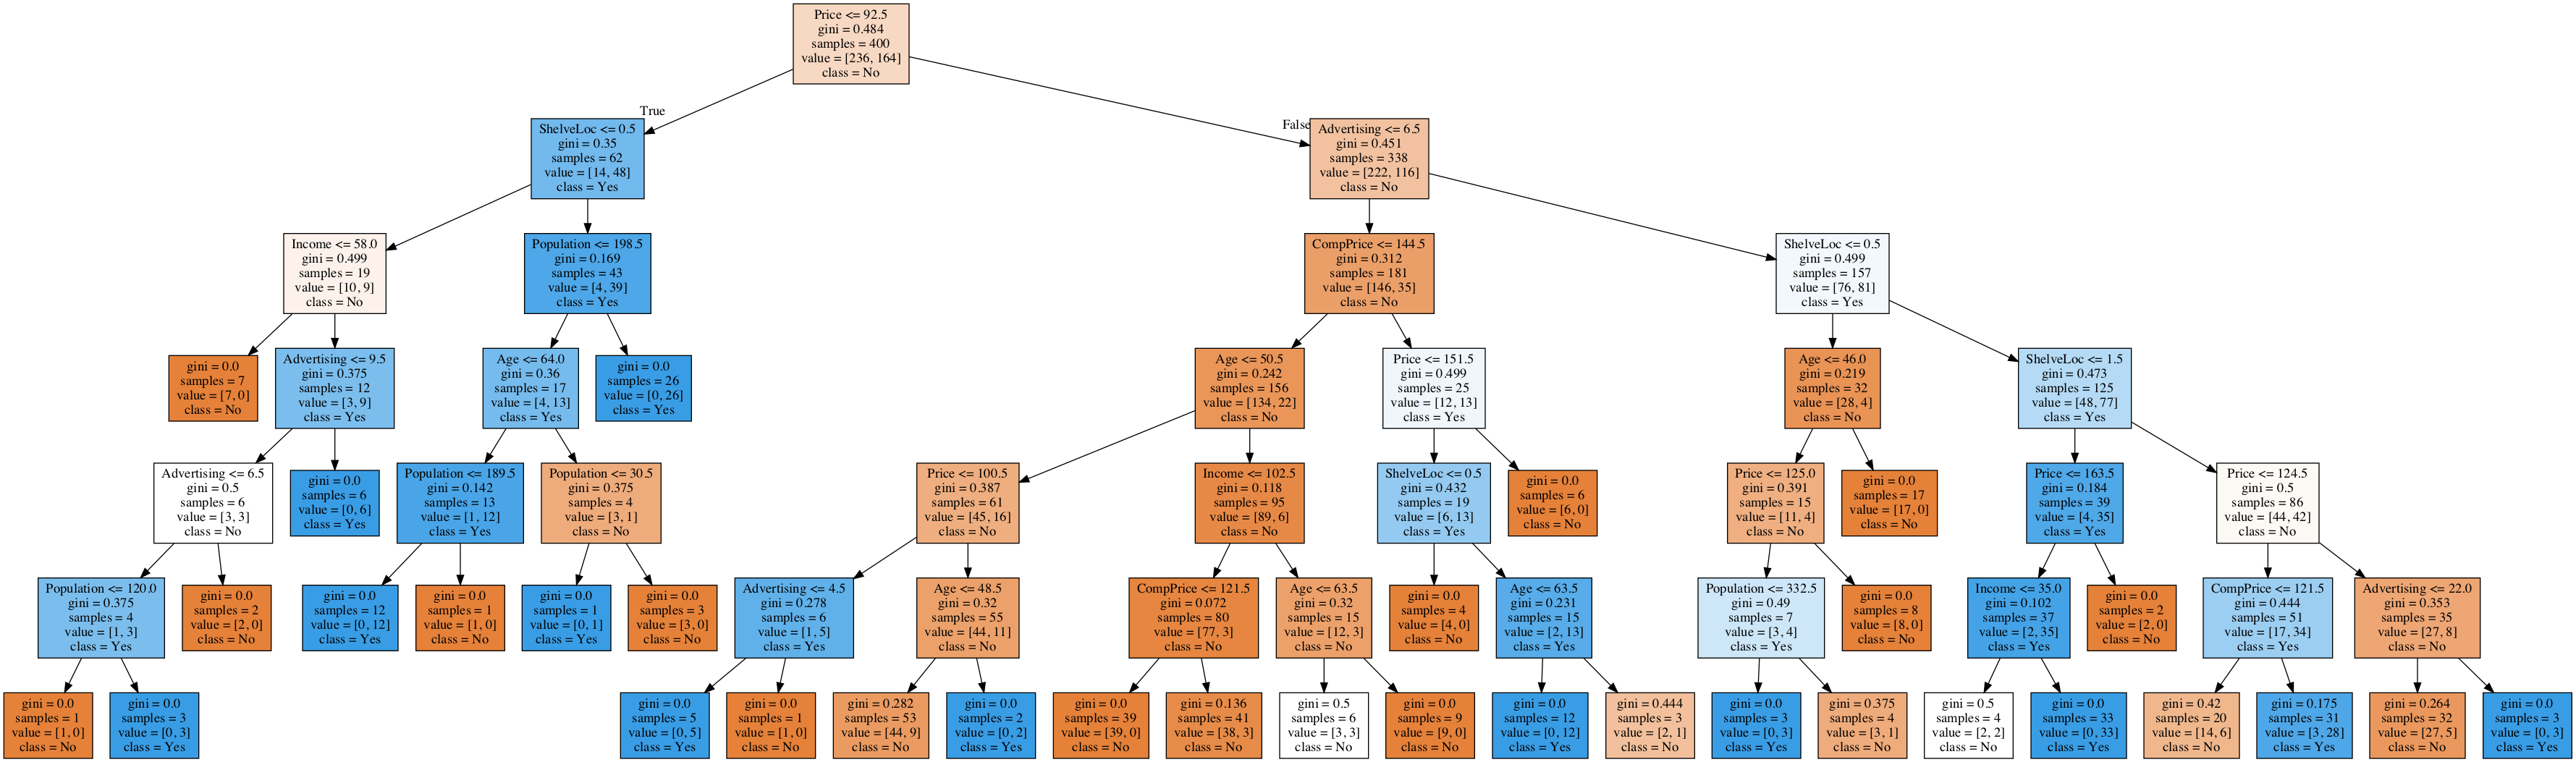

In [47]:
graph1,=print_tree(Clf, features=X.columns, class_names=['No','Yes'])
Image(graph1.create_png())

In [48]:
print(classification_report(y, Clf.predict(X)))

              precision    recall  f1-score   support

           0       0.89      0.99      0.93       236
           1       0.98      0.82      0.89       164

   micro avg       0.92      0.92      0.92       400
   macro avg       0.93      0.90      0.91       400
weighted avg       0.92      0.92      0.92       400



In [49]:
Clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [50]:
print(classification_report(y_test, Clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80       118
           1       0.73      0.62      0.67        82

   micro avg       0.75      0.75      0.75       200
   macro avg       0.75      0.73      0.73       200
weighted avg       0.75      0.75      0.75       200



In [51]:
CM=pd.DataFrame(confusion_matrix(y_test, Clf.predict(X_test)).T, index=['No','Yes'], columns=['No','Yes'])
CM.index.name='Predicted'
CM.columns.name='True'
CM

True,No,Yes
Predicted,,
No,99,31
Yes,19,51


In [54]:
print('AUC Score', roc_auc_score(y_test, Clf.predict_proba(X_test)[:,1]))

AUC Score 0.7129495659363373


## Find the best tree size using Cross-Validation

In [55]:
tree_sizes=np.arange(2,31)

ACC=[]
AUC=[]

#7-fold CV for each tree-size
for size in tree_sizes:
    clf_tr=DecisionTreeClassifier(max_leaf_nodes=size, random_state=123)
    ACC_s=cross_val_score(clf_tr, X, y, cv=7, scoring='accuracy')
    AUC_s=cross_val_score(clf_tr, X, y, cv=7, scoring='roc_auc')
    ACC.append(np.mean(ACC_s))
    AUC.append(np.mean(AUC_s))

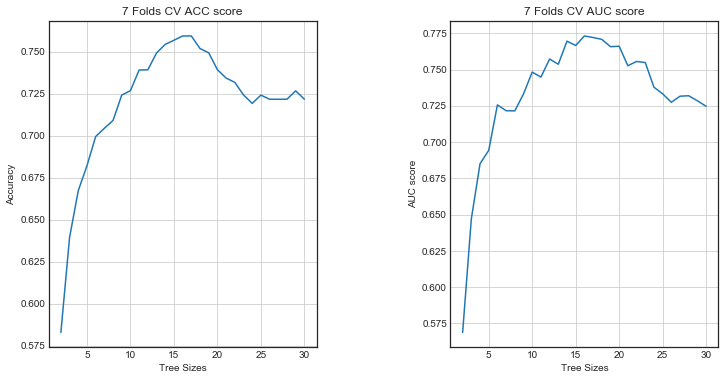

In [61]:
#Plot CV-Accuracy and AUC scores with respect to tree size
fig, (ax1, ax2)=plt.subplots(1,2, figsize=(12,6))
fig.subplots_adjust(wspace=0.5)

##Plot the first CV-Accuracy
ax1.plot(tree_sizes, ACC)
ax1.set_xlabel('Tree Sizes')
ax1.set_ylabel('Accuracy')
ax1.set_title('7 Folds CV ACC score')
ax1.grid(True)

##Plot the second AUC
ax2.plot(tree_sizes, AUC)
ax2.set_xlabel('Tree Sizes')
ax2.set_ylabel('AUC score')
ax2.set_title('7 Folds CV AUC score')
ax2.grid(True)

In [62]:
CLF=DecisionTreeClassifier(max_leaf_nodes=16)
CLF.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=16,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [63]:
print(classification_report(y_test, CLF.predict(X_test)))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79       118
           1       0.71      0.63      0.67        82

   micro avg       0.74      0.74      0.74       200
   macro avg       0.74      0.73      0.73       200
weighted avg       0.74      0.74      0.74       200



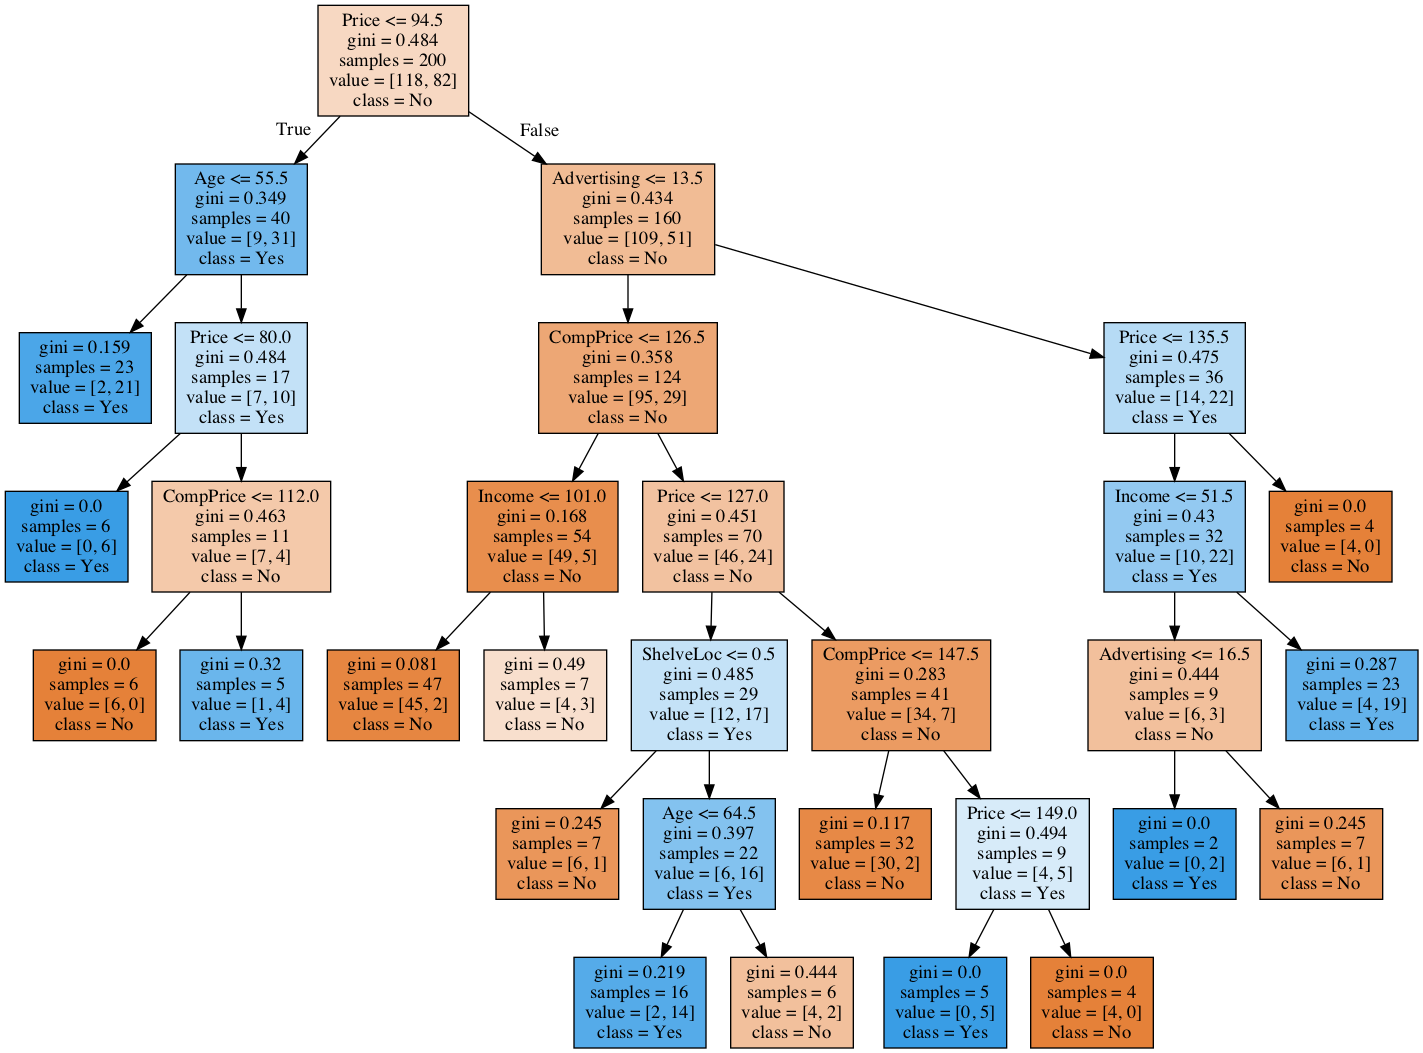

In [64]:
graph2,=print_tree(CLF, features=X_train.columns, class_names=['No','Yes'])
Image(graph2.create_png())

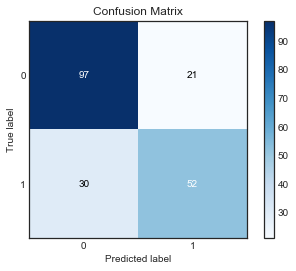

In [70]:
plot_confusion_matrix(y_test, CLF.predict(X_test))